# Hand written number identification by LeNet-5 🔢
### Aim: To identify number images by building and running LeNet-5 CNN

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

## 1. Data preparation
### Setting NN parameters

In [2]:
n_epochs = 5
log_interval = 50
size = 32
learn_rate = 0.06
momentum = 0.1

# Choose device based on whether GPU is applicable
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Loading dataset

In [3]:
# Image augmentation by resize/totensor/normalize to prevent overfitting
transform = transforms.Compose([transforms.Resize(size), 
                                transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])

trainset = MNIST(root='./', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = MNIST(root='./', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Print labels and tensor size to verify

In [4]:
# Verify a test dataset tensor
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

tensor([6, 2, 3, 4, 3, 6, 4, 0, 5, 2, 8, 3, 2, 9, 5, 9, 6, 0, 9, 3, 1, 2, 4, 8,
        5, 5, 2, 5, 8, 7, 1, 4, 9, 2, 2, 3, 7, 2, 2, 2, 6, 3, 6, 8, 9, 7, 1, 1,
        7, 9, 8, 0, 2, 2, 5, 4, 6, 9, 8, 2, 8, 3, 3, 3, 3, 2, 8, 2, 7, 8, 0, 0,
        3, 5, 4, 9, 1, 6, 9, 8, 9, 8, 4, 0, 6, 5, 9, 6, 7, 8, 8, 8, 6, 7, 4, 8,
        0, 2, 8, 1, 4, 6, 2, 1, 9, 3, 9, 6, 7, 1, 6, 1, 7, 7, 1, 4, 3, 0, 2, 7,
        9, 1, 8, 9, 6, 2, 4, 7, 9, 4, 6, 0, 1, 5, 2, 6, 3, 2, 7, 9, 4, 4, 0, 3,
        3, 3, 3, 4, 7, 0, 0, 4, 7, 2, 0, 1, 8, 9, 4, 6, 2, 3, 6, 2, 9, 4, 0, 1,
        5, 3, 2, 1, 0, 7, 2, 0, 8, 5, 2, 0, 0, 6, 7, 2, 4, 3, 0, 3, 9, 3, 5, 8,
        8, 6, 7, 1, 7, 8, 4, 8, 9, 1, 7, 5, 9, 0, 8, 3, 8, 2, 1, 5, 1, 1, 7, 1,
        5, 5, 8, 9, 0, 3, 2, 2, 7, 3, 9, 2, 7, 1, 1, 0, 5, 8, 3, 1, 1, 6, 9, 8,
        9, 1, 6, 8, 0, 2, 2, 1, 5, 9, 0, 0, 7, 2, 8, 1, 1, 7, 1, 1, 9, 4, 6, 5,
        1, 2, 5, 3, 5, 2, 2, 0, 8, 7, 6, 2, 2, 1, 9, 4, 2, 3, 4, 7, 0, 3, 1, 3,
        1, 1, 2, 8, 9, 6, 6, 7, 2, 8, 6,

### Show some labelled testset

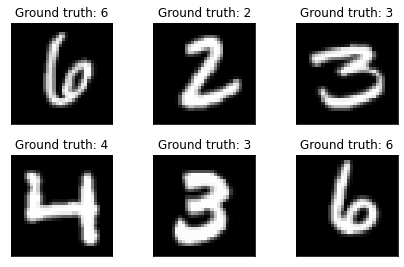

In [5]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

## 2. Building LeNet-5 NN

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0, bias=True)
        self.max_pool_1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0, bias=True)
        self.max_pool_2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0, bias=False)
        
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.max_pool_1(x)        
        x = F.relu(self.conv2(x))
        x = self.max_pool_2(x)        
        x = F.relu(self.conv3(x))
        
        x = x.view(-1, 120)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        return F.log_softmax(x, dim=1)

In [7]:
network = Net().to(DEVICE)
optimizer = optim.SGD(network.parameters(), lr=learn_rate, momentum=momentum)

In [8]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)]
test_acc = []

### Define train function

In [9]:
def train(epoch, device):
    network.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # Set gradient to zero before BP
        output = network(data)
        loss = F.nll_loss(output, target)
        
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))

### Define test function

In [10]:
def test(device):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad(): # ban BP to test
        for data, target in testloader:
            data, target = data.to(device), target.to(device)
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(testloader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))
    test_acc.append(correct / len(testloader.dataset))

## 3. Training and output
#### Only 5 rounds of training set to be done to save time, but more rounds could reach higher accuracy

In [11]:
test(DEVICE)
for epoch in range(1, n_epochs + 1):
    train(epoch, DEVICE)
    test(DEVICE)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3043, Accuracy: 958/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292016
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.260396
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.033904
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.969062
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.480797
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.630634
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.597971
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.299964
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.682064
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.713569
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.472852
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.287817
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.379112
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.253278
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.463799
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.396367
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.364709
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.258460
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.259927

T

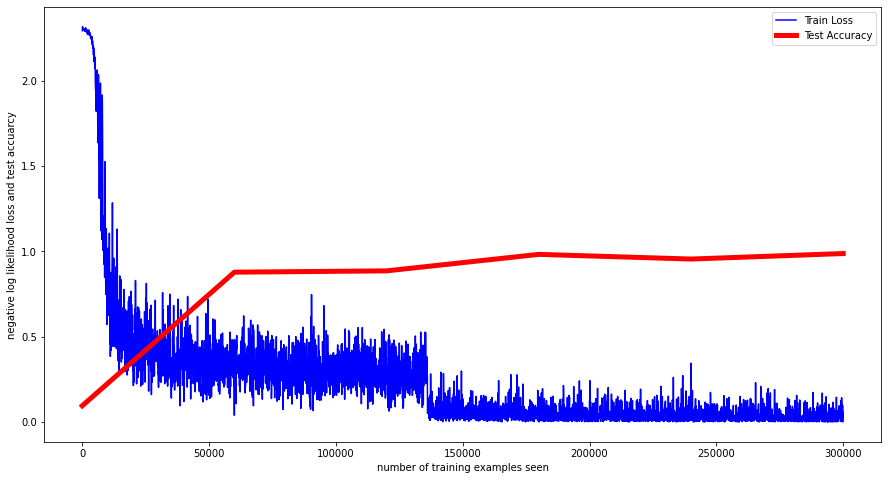

In [12]:
fig = plt.figure(figsize=(15, 8))
plt.plot(train_counter, train_losses, color='blue')
plt.plot(test_counter, test_acc, color='red', linewidth=5)
plt.legend(['Train Loss', 'Test Accuracy'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss and test accuarcy')
plt.show()

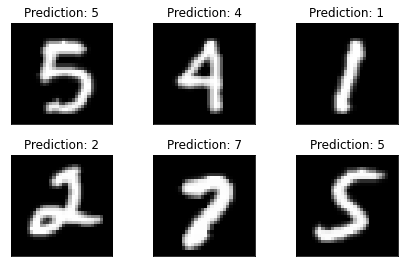

In [13]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    example_data, example_targets = example_data.to(DEVICE), example_targets.to(DEVICE)
    output = network(example_data)
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0].cpu().clone().numpy(), cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()